<a href="https://colab.research.google.com/github/dhruvsaini13/DEEP-LEARNING-LAB/blob/main/DL_LAB_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# accuracy graph wrt epochs, loss graph wrt epochs, set multiple learning rates


Training with Learning Rate: 0.1
Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8822 - loss: 0.2454 - val_accuracy: 0.9900 - val_loss: 0.0419
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9952 - loss: 0.0204 - val_accuracy: 0.9917 - val_loss: 0.0348
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9986 - loss: 0.0118 - val_accuracy: 0.9917 - val_loss: 0.0333
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9985 - loss: 0.0084 - val_accuracy: 0.9917 - val_loss: 0.0307
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9986 - loss: 0.0052 - val_accuracy: 0.9917 - val_loss: 0.0305
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9981 - loss: 0.0056 - val_accuracy: 0.9917 - val_loss: 0.0314
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9992 - loss: 0.0039 - val_accuracy: 0.9917 - val_loss: 0.0301
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0035

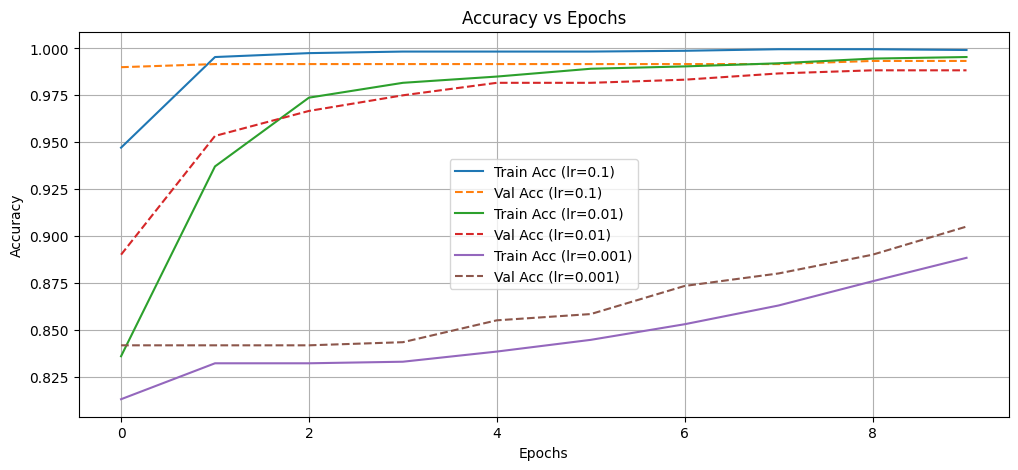

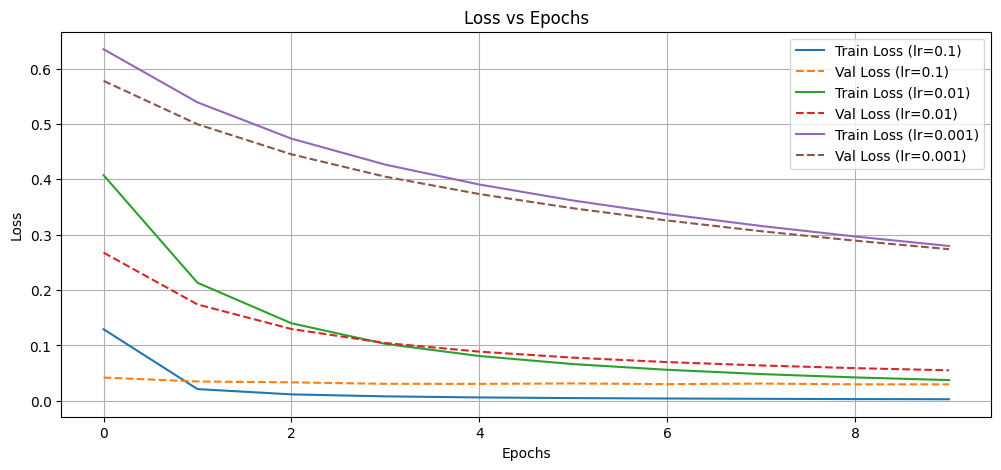

In [24]:
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


df = pd.read_csv("spam_or_not_spam.csv")

df.columns = ['text', 'label']

# 1. Text Cleaning
def clean_text(text):
    text = str(text)
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text.strip()

df['text'] = df['text'].fillna('') # Fill NaN values with empty strings
df['text'] = df['text'].apply(clean_text)

# 2. TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['text']).toarray()
y = df['label'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Learning Rates to Test
learning_rates = [0.1, 0.01, 0.001]

histories = {}

# 4. Train Model for Each Learning Rate
for lr in learning_rates:
    print(f"\nTraining with Learning Rate: {lr}")

    model = Sequential([
        Dense(1, input_dim=X_train.shape[1], activation='sigmoid')
    ])
    optimizer = Adam(learning_rate=lr)
    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    history = model.fit(
        X_train,
        y_train,
        epochs=10,
        batch_size=32,
        validation_data=(X_test, y_test),
        verbose=1
    )
    histories[lr] = history.history

# ==========================
# 7. Plot Accuracy Graph
# ==========================
plt.figure(figsize=(12,5))

for lr in learning_rates:
    plt.plot(histories[lr]['accuracy'], label=f"Train Acc (lr={lr})")
    plt.plot(histories[lr]['val_accuracy'], linestyle='--',
             label=f"Val Acc (lr={lr})")

plt.title("Accuracy vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

# 8. Plot Loss Graph
plt.figure(figsize=(12,5))

for lr in learning_rates:
    plt.plot(histories[lr]['loss'], label=f"Train Loss (lr={lr})")
    plt.plot(histories[lr]['val_loss'], linestyle='--',
             label=f"Val Loss (lr={lr})")

plt.title("Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()